In [120]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
# Load the two CSV files into dataframes
df_se = pd.read_csv('../raids/salvations_edge_analysis/se_player_report.csv')
df_ron = pd.read_csv('../raids/root_of_nightmares_analysis/ron_player_report.csv')
df_ce = pd.read_csv('../raids/crotas_end_analysis/ce_player_report.csv')
df_ce_c = pd.read_csv('../raids/crotas_end_analysis/ce_c_player_report.csv')

In [122]:
df_se["Raid"] = "Salvation's Edge"
df_ron["Raid"] = "Root of Nightmares"
df_ce["Raid"] = "Crota's End"
df_ce_c["Raid"] = "Crota's End Challenge"

In [123]:
# Filter data to include only players who successfully cleared the event
df_se_cleared = df_se[df_se['Cleared'] == True]
df_ron_cleared = df_ron[df_ron['Cleared'] == True]
df_ce_cleared = df_ce[df_ce['Cleared'] == True]
df_ce_c_cleared = df_ce_c[df_ce_c['Cleared'] == True]

In [124]:
df_se_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2971 entries, 0 to 3686
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  2969 non-null   object
 1   Class        2959 non-null   object
 2   Cleared      2971 non-null   bool  
 3   Clear Link   2971 non-null   object
 4   Raid         2971 non-null   object
dtypes: bool(1), object(4)
memory usage: 119.0+ KB


In [125]:
df_combined_raids = pd.concat([df_se_cleared, df_ron_cleared, df_ce_cleared, 
                               df_ce_c_cleared])

class_counts = df_combined_raids.groupby(["Raid", "Class"]).size().unstack(fill_value=0)

In [126]:
class_order = ["Hunter", "Titan", "Warlock"]
color_map = {"Hunter": "#51D6E9", "Titan": "#D03837", "Warlock": "#E8DB2D"}

class_counts = class_counts[class_order]
colors = [color_map[cls] for cls in class_counts.columns]

In [135]:
def plot_class_distribution(df, title):
    # Fixed class order and matching color map
    class_order = ["Hunter", "Titan", "Warlock"]
    colors = ["#51D6E9", "#D03837", "#E8DB2D"]  # Cyan, Red, Mustard Yellow

    # Get class counts and reindex to preserve order
    class_counts = df['Class'].value_counts().reindex(class_order, fill_value=0)

    # Plot
    plt.figure(figsize=(6, 4))
    class_counts.plot(kind='bar', color=colors)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


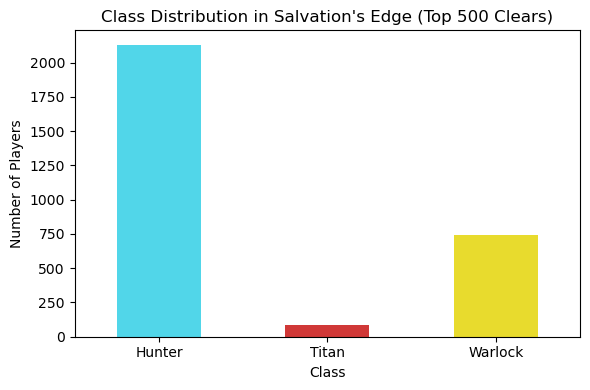

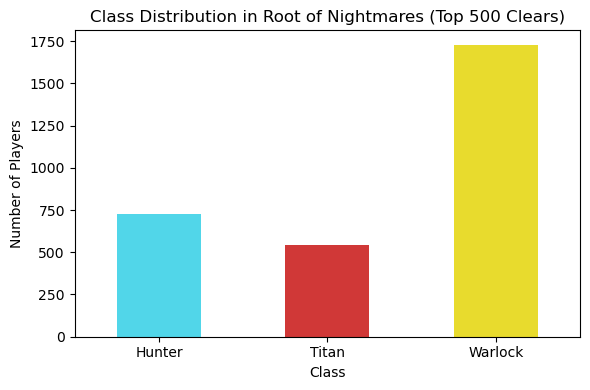

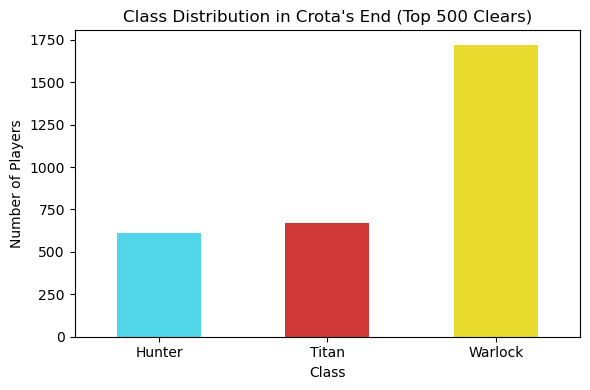

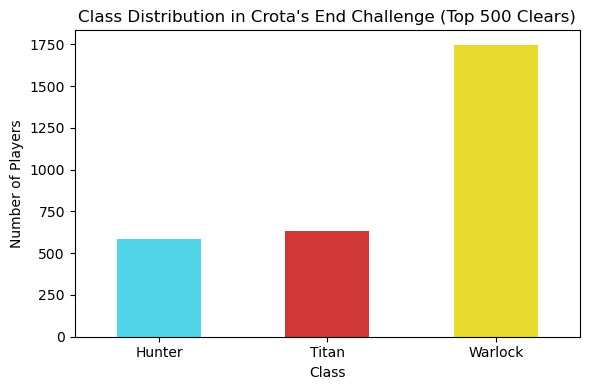

In [136]:
# Plot class distribution for SE player report
plot_class_distribution(df_se_cleared, "Class Distribution in Salvation's Edge (Top 500 Clears)")
# Plot class distribution for SE player report
plot_class_distribution(df_ron_cleared, "Class Distribution in Root of Nightmares (Top 500 Clears)")
# Plot class distribution for SE player report
plot_class_distribution(df_ce_cleared, "Class Distribution in Crota's End (Top 500 Clears)")
# Plot class distribution for SE player report
plot_class_distribution(df_ce_c_cleared, "Class Distribution in Crota's End Challenge (Top 500 Clears)")

In [137]:
# Compare class distributions between the three datasets
def compare_class_distribution(combined_df):
    combined_df.plot(kind="bar", figsize=(10, 6), color=colors)
    
    plt.title("Class Distribution by Raid")
    plt.xlabel("Raid")
    plt.ylabel("Number of Players")
    plt.xticks(rotation=0)
    plt.legend(title="Class")
    plt.tight_layout()

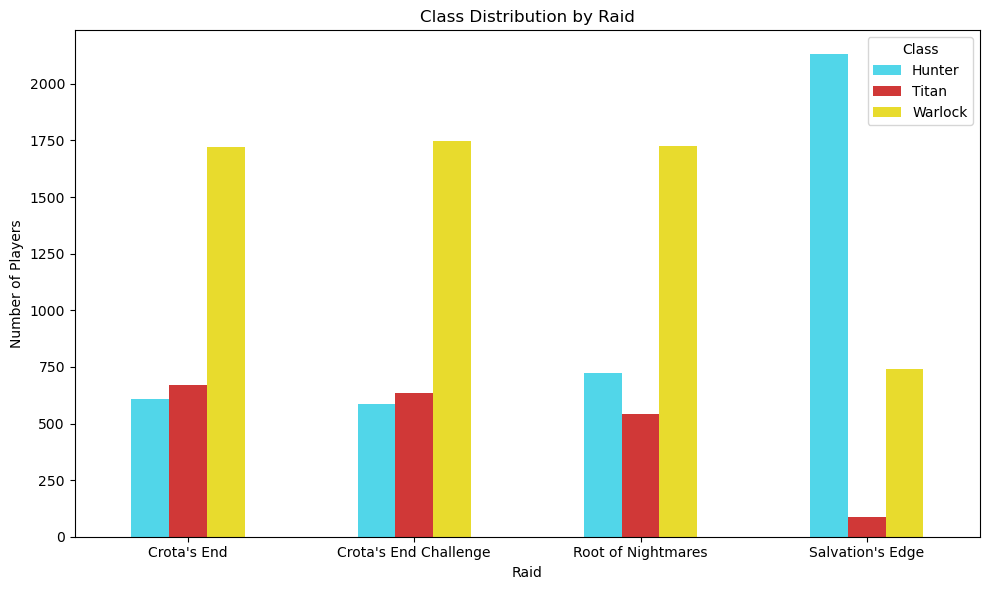

In [138]:
# Compare class distributions between SE and VH player reports
compare_class_distribution(class_counts)